In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
print(tf.__version__)

2.13.0


# data preprocessing and split

In [2]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data = data.dropna()
data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
1,0.0,1000,-30,30,283,0.988,292.1,1.019,671.9,33.27,67.2,3.69,4.31,6.55,7.48,364,4.06,245.1,469.0,1.0
2,1.0,1000,-30,30,293,0.988,297.4,1.019,671.1,33.15,66.9,3.73,4.29,6.52,7.42,365.9,3.94,250.8,477.0,1.0
3,2.0,1000,-30,30,303,0.988,302.6,1.019,670.9,33.03,66.6,3.76,4.26,6.48,7.38,367.1,3.89,253.8,485.0,1.0
4,3.0,1000,-30,35,283,0.991,292.3,1.02,673.2,33.57,67.8,3.3,4.42,6.59,7.51,365.4,4.2,246.9,454.0,1.0
5,4.0,1000,-30,35,293,0.991,297.4,1.02,672.2,33.44,67.5,3.34,4.39,6.55,7.46,367.5,4.05,253.2,461.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [3]:
len_0 = len(data.loc[data['Knocking'] == 0])
len_1 = len(data.loc[data['Knocking'] == 1])
print(len_0)
print(len_1)

1064
1081


In [4]:
X_data = data.loc[:, ['Engine Speed', 'Spark Timing', 'Throttle Angle', 'Ambient Temperature', 
                                   'Intake Pressure', 'Intake Temperature','Exhaust Pressure', 'Exhaust Temperature', 'Injected Mass']]
y_data = data['Knocking']
print(X_data)
print(y_data)

     Engine Speed Spark Timing Throttle Angle Ambient Temperature   
1            1000          -30             30                 283  \
2            1000          -30             30                 293   
3            1000          -30             30                 303   
4            1000          -30             35                 283   
5            1000          -30             35                 293   
...           ...          ...            ...                 ...   
2141         6000          -10             85                 293   
2142         6000          -10             85                 303   
2143         6000          -10             90                 283   
2144         6000          -10             90                 293   
2145         6000          -10             90                 303   

     Intake Pressure Intake Temperature Exhaust Pressure Exhaust Temperature   
1              0.988              292.1            1.019               671.9  \
2          

In [5]:
train_input, test_input, train_output, test_output = train_test_split(X_data, y_data,test_size=0.2, shuffle=True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42) # train, validation, test 비율 조정, 함수 만들어 보기
print(train_input.shape)
print(train_output.shape)
print(val_input.shape)
print(val_output.shape)
print(test_input.shape)
print(test_output.shape)


(1287, 9)
(1287,)
(429, 9)
(429,)
(429, 9)
(429,)


In [6]:

ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale = ss.transform(val_input)
test_scale = ss.transform(test_input)
print(train_scale)
print(val_scale)
print(test_scale)

[[ 0.94116682 -1.42752381 -0.27742293 ...  0.8590414   0.36974684
   0.96453667]
 [ 1.57418573 -1.42752381 -0.80834236 ...  1.1903374   0.59817701
   0.32597037]
 [ 0.3081479  -0.01318729  0.78441592 ...  0.3068814   0.39817806
   0.87128571]
 ...
 [ 1.57418573  1.40114924 -1.07380208 ...  1.58053047  2.0579733
   0.10500616]
 [-1.27439938 -0.72035555  0.78441592 ... -1.15082099 -1.44789072
  -1.15185449]
 [-0.95788993 -0.72035555  0.78441592 ... -1.01094046 -0.7988745
  -0.74438837]]
[[-1.27439938  1.40114924 -1.33926179 ... -1.12873459 -0.8371096
  -1.51269512]
 [-1.59090884  1.40114924  0.51895621 ... -1.32015006 -1.63710542
  -1.84515504]
 [-0.95788993 -1.42752381 -1.33926179 ... -1.03302686 -0.93024637
  -0.91264552]
 ...
 [-0.95788993 -1.42752381 -0.27742293 ... -1.02566473 -0.88122701
  -0.80520421]
 [ 1.57418573 -0.72035555 -1.33926179 ...  0.94002487  0.77562707
  -0.35719421]
 [-0.32487101 -0.72035555 -0.27742293 ... -0.488229   -0.31848486
   0.2408282 ]]
[[ 0.3081479   1.40

# DNN Model 

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = (9,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-17 15:00:02.258798: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-17 15:00:02.258821: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-17 15:00:02.258829: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-17 15:00:02.258862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-17 15:00:02.258883: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
'''
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
'''

In [9]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-classification-model.h5')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_scale, train_output, epochs=10000, batch_size = 64, validation_data=(val_scale, val_output), callbacks=[callback, checkpoint_cb])


Epoch 1/10000


2024-03-17 15:00:04.489636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.5574 - accuracy: 0.6954

2024-03-17 15:00:05.439662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 38ms/step - loss: 0.5574 - accuracy: 0.6954 - val_loss: 0.3431 - val_accuracy: 0.8392
Epoch 2/10000
10/21 [=============>................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8438

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 16ms/step - loss: 0.3342 - accuracy: 0.8524 - val_loss: 0.2647 - val_accuracy: 0.9044
Epoch 3/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.2687 - accuracy: 0.8998 - val_loss: 0.2353 - val_accuracy: 0.9068
Epoch 4/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.2260 - accuracy: 0.9052 - val_loss: 0.2124 - val_accuracy: 0.9091
Epoch 5/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.2230 - accuracy: 0.9075 - val_loss: 0.2056 - val_accuracy: 0.9021
Epoch 6/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.2065 - accuracy: 0.9114 - val_loss: 0.1950 - val_accuracy: 0.9207
Epoch 7/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2001 - accuracy: 0.9060 - val_loss: 0.1861 - val_accuracy: 0.9114
Epoch 8/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.1874 - accuracy: 0.9192 - val_loss: 0.1813 - val_accuracy: 0.9138
Epoch 

In [10]:
model.save('best-classification-model.h5')
model = keras.models.load_model('best-classification-model.h5')

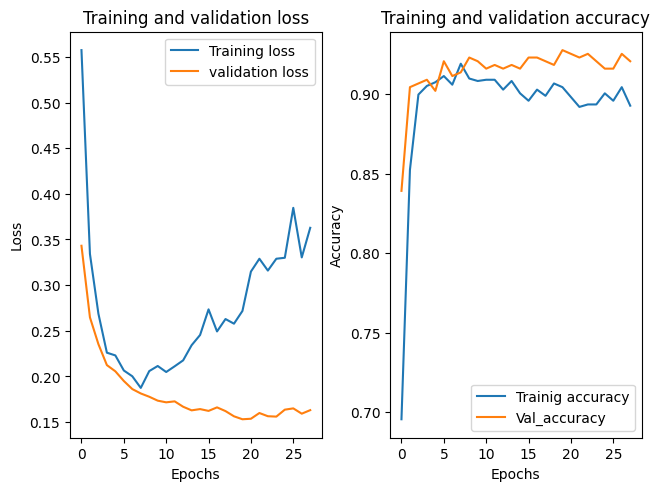

In [11]:
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
val_accuracy = history_dic['val_accuracy']
fig, axs= plt.subplots(1, 2, constrained_layout = True)
axs[0].plot(loss, label = 'Training loss')
axs[0].plot(val_loss, label = 'validation loss')
axs[1].plot(accuracy, label = 'Trainig accuracy')
axs[1].plot(val_accuracy, label = 'Val_accuracy')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[0].legend()
axs[1].legend()
plt.show()
# loss값 파일 저장 및 출력 필요


In [12]:
loss_accuracy_df = pd.DataFrame(((loss[i], val_loss[i], accuracy[i], val_accuracy[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy'])
loss_accuracy_df

,Loss,Val_Loss,Accuracy,Val_Accuracy
0,0.557394,0.343094,0.695416,0.839161
1,0.334164,0.264668,0.852370,0.904429
2,0.268670,0.235321,0.899767,0.906760
3,0.225979,0.212372,0.905206,0.909091
4,0.222975,0.205560,0.907537,0.902098
5,0.206469,0.194968,0.911422,0.920746
6,0.200135,0.186115,0.905983,0.911422
7,0.187385,0.181311,0.919192,0.913753
8,0.205816,0.177711,0.909868,0.923077
9,0.211397,0.173425,0.908314,0.920746


In [13]:
loss_accuracy_df.to_csv('loss_and_accuracy.csv', index=True)

In [14]:
loss_and_accuracy_test = model.evaluate(test_scale, test_output)
loss_and_accuracy_train = model.evaluate(train_scale, train_output)
loss_and_accuracy_val = model.evaluate(val_scale, val_output)
print(loss_and_accuracy_test)
print(loss_and_accuracy_train)
print(loss_and_accuracy_val)
print('loss = ', loss_and_accuracy_test[0])
print('loss = ', loss_and_accuracy_train[0])
print('loss = ', loss_and_accuracy_val[0])
print('accuracy = ', loss_and_accuracy_train[1])
print('accuracy = ', loss_and_accuracy_val[1])
print('accuracy = ', loss_and_accuracy_test[1])

 9/14 [==================>...........] - ETA: 0s - loss: 0.1490 - accuracy: 0.9410

2024-03-17 15:00:26.942554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 7ms/step - loss: 0.1813 - accuracy: 0.9138
[0.1747608780860901, 0.9254079461097717]
[0.16199083626270294, 0.9246309399604797]
[0.18131054937839508, 0.9137529134750366]
loss =  0.1747608780860901
loss =  0.16199083626270294
loss =  0.18131054937839508
accuracy =  0.9246309399604797
accuracy =  0.9137529134750366
accuracy =  0.9254079461097717


In [15]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)


28/41 [===================>..........] - ETA: 0s

2024-03-17 15:00:28.829203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


0.9249
0.9222
0.9183


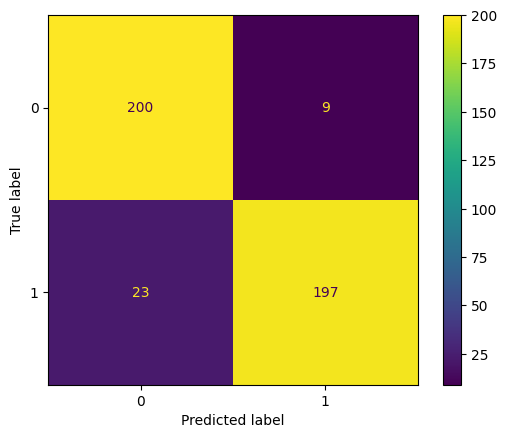

In [16]:
#Confusion matrix
predicted_test = np.array([1 if x >= 0.5 else 0 for x in predicted_test])
predicted_train = np.array([1 if x >= 0.5 else 0 for x in predicted_train])
predicted_val = np.array([1 if x >= 0.5 else 0 for x in predicted_val])

actual_test = np.array(test_output)
actual_train = np.array(train_output)
actual_val = np.array(val_output)

conf_matrix = confusion_matrix(actual_test, predicted_test)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()

#f1-score
print(round(f1_score(actual_test, predicted_test), 4))
print(round(f1_score(actual_train, predicted_train), 4))
print(round(f1_score(actual_val, predicted_val), 4))

In [17]:
print(predicted_test)
print(predicted_train)
print(predicted_val)

[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0]
[1 1 0 ... 0 1 1]
[0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0

In [18]:
test_df = pd.DataFrame(((predicted_test[i]) for i in range(len(test_output))), columns=['Predicted_test'], index = test_output.index)
test_df['Raw_test'] = (test_output)
test_df

,Predicted_test,Raw_test
1345,0,0.0
1935,0,0.0
129,1,1.0
333,1,1.0
1164,0,0.0
...,...,...
545,1,1.0
1201,1,1.0
509,0,1.0
1333,0,0.0


In [19]:
train_df = pd.DataFrame(((predicted_train[i]) for i in range(len(train_output))), columns=['Predicted_train'], index = train_output.index)
train_df['Raw_train'] = (train_output)
train_df

,Predicted_train,Raw_train
1578,1,1.0
1962,1,0.0
1278,0,0.0
58,1,1.0
94,1,1.0
...,...,...
2109,0,0.0
471,1,1.0
2113,0,0.0
263,1,1.0


In [20]:
validation_df = pd.DataFrame(((predicted_val[i]) for i in range(len(val_output))), columns=['Predicted_val'], index = val_output.index)
validation_df['Raw_validation'] = (val_output)
validation_df

,Predicted_val,Raw_validation
356,0,1.0
181,1,1.0
395,1,1.0
1487,0,0.0
168,1,1.0
...,...,...
524,1,1.0
1137,0,0.0
407,1,1.0
1993,0,0.0


In [21]:
test_df.to_csv('Test_df.csv', index=True)
train_df.to_csv('Train_df.csv', index=True)
validation_df.to_csv('Validation_df.csv', index=True)

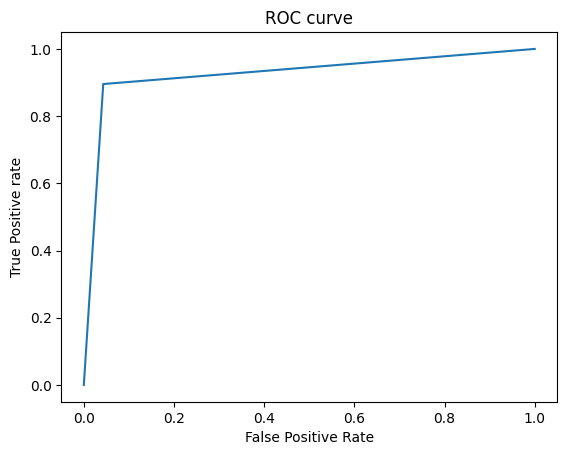

0.9261961722488038


In [22]:
#ROC CURVE
fpr, tpr, thresh = roc_curve(actual_test, predicted_test, pos_label=1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()
    
#AUC    
auc_score1 = roc_auc_score(actual_test, predicted_test)
print(auc_score1)

In [23]:
print(round(recall_score(test_output, predicted_test), 4))
print(round(recall_score(train_output, predicted_train), 4))
print(round(recall_score(val_output, predicted_val), 4))

0.8955
0.9098
0.9083


In [24]:
print(round(precision_score(test_output, predicted_test), 4))
print(round(precision_score(train_output, predicted_train), 4))
print(round(precision_score(val_output, predicted_val), 4))

0.9563
0.935
0.9286


In [25]:
data = [[round(loss_and_accuracy_test[0], 4), round(loss_and_accuracy_train[1], 4), round(recall_score(test_output, predicted_test), 4), round(precision_score(test_output, predicted_test), 4), round(f1_score(actual_test, predicted_test), 4)],
        [round(loss_and_accuracy_train[0], 4), round(loss_and_accuracy_train[1], 4),round(recall_score(train_output, predicted_train), 4), round(precision_score(train_output, predicted_train), 4), round(f1_score(actual_train, predicted_train), 4)],
        [round(loss_and_accuracy_val[0], 4), round(loss_and_accuracy_val[1], 4),round(recall_score(val_output, predicted_val), 4), round(precision_score(val_output, predicted_val), 4), round(f1_score(actual_val, predicted_val), 4)]]
index = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1_score']
print(data)


[[0.1748, 0.9246, 0.8955, 0.9563, 0.9249], [0.162, 0.9246, 0.9098, 0.935, 0.9222], [0.1813, 0.9138, 0.9083, 0.9286, 0.9183]]


In [26]:
metrics_df = pd.DataFrame(data, columns = index, index= ['Test', 'Train', 'Validation'])
metrics_df.to_csv('Binary_Classification_Metrics.csv')
metrics_df

,Loss,Accuracy,Recall,Precision,F1_score
Test,0.1748,0.9246,0.8955,0.9563,0.9249
Train,0.1620,0.9246,0.9098,0.9350,0.9222
Validation,0.1813,0.9138,0.9083,0.9286,0.9183


# Hyperparameters Tuning

In [28]:
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.1, 0.2, 0.3],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [50, 100, 200],
    'batch_size' : [64, 32, 16]
}

# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행
best_accuracy = 0
best_params = {}
new_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9,)))
    model.add(keras.layers.Dropout(params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(params['dropout_rate']))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, epochs=1000, batch_size=params['batch_size'], 
                        validation_data=(val_scale, val_output), 
                        callbacks=[callback, checkpoint_cb],
                        verbose=0)
    
    # 검증 세트에 대한 정확도 계산
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation loss :", val_accuracy_and_loss[0])
    print("Validation accuracy : ", val_accuracy_and_loss[1])

    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], val_accuracy_and_loss[0], val_accuracy_and_loss[1]]
    params_df = pd.DataFrame({"Learning_Rate" : [params['learning_rate']], 'Dropout_Rate' : [params['dropout_rate']], "Hidden_units" : [params['hidden_units']], "Batch_size" : [params['batch_size']], "Validation_Loss" : [val_accuracy_and_loss[0]], "Validation_Accuracy" : [val_accuracy_and_loss[1]]})
    new_df = pd.concat([new_df, params_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 정확도 업데이트
    if val_accuracy_and_loss[0] > best_accuracy:
        best_accuracy = val_accuracy_and_loss[0]
        best_params = params
model.save_weights('best-hyperparameters.h5')
    
print("Best parameters:", best_params)
print("Best validation accuracy:", best_accuracy)



'\nfrom sklearn.model_selection import ParameterGrid\n\n# 하이퍼파라미터 그리드 정의\nparam_grid = {\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'dropout_rate\': [0.1, 0.2, 0.3],\n    \'hidden_layers\': [1, 2, 3],\n    \'hidden_units\': [50, 100, 200],\n    \'batch_size\' : [64, 32, 16]\n}\n\n# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행\nbest_accuracy = 0\nbest_params = {}\nnew_df = pd.DataFrame()\n\nfor params in ParameterGrid(param_grid):\n    print("Training with parameters:", params)\n    \n    # 모델 생성\n    model = keras.Sequential()\n    model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\', input_shape=(9,)))\n    model.add(keras.layers.Dropout(params[\'dropout_rate\']))\n    \n    for _ in range(params[\'hidden_layers\']):\n        model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\'))\n        model.add(keras.layers.Dropout(params[\'dropout_rate\']))\n    \n    model.add(keras.layers.Dense(1, activation=\'sigmoid\'))\n    \n    # 모델 컴파일\n    optimizer = tf

'\nfrom sklearn.model_selection import ParameterGrid\n\n# 하이퍼파라미터 그리드 정의\nparam_grid = {\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'dropout_rate\': [0.1, 0.2, 0.3],\n    \'hidden_layers\': [1, 2, 3],\n    \'hidden_units\': [50, 100, 200],\n    \'batch_size\' : [64, 32, 16]\n}\n\n# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행\nbest_accuracy = 0\nbest_params = {}\nnew_df = pd.DataFrame()\n\nfor params in ParameterGrid(param_grid):\n    print("Training with parameters:", params)\n    \n    # 모델 생성\n    model = keras.Sequential()\n    model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\', input_shape=(9,)))\n    model.add(keras.layers.Dropout(params[\'dropout_rate\']))\n    \n    for _ in range(params[\'hidden_layers\']):\n        model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\'))\n        model.add(keras.layers.Dropout(params[\'dropout_rate\']))\n    \n    model.add(keras.layers.Dense(1, activation=\'sigmoid\'))\n    \n    # 모델 컴파일\n    optimizer = tf

In [ ]:
new_df.to_csv('gridsearch_hyperparameters.csv')
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_accuracy]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_Accuracy'])
grid_result.to_csv('GridSearch_Result')
print(grid_result)
print(new_df)


In [48]:
import random
# 하이퍼파라미터 그리드 정의
param_random = {
    'learning_rate': random.uniform(0.1, 0.00001),
    'dropout_rate': random.uniform(0.1, 0.4),
    'hidden_layers': random.randint(1, 4),
    'hidden_units': random.randint(50, 200),
    'batch_size' : random.randint(16, 65)
}
new_randomsearch_df = pd.DataFrame()
best_accuracy_random = 0

for _ in range(10):
    param_random = {
    'learning_rate': random.uniform(0.1, 0.00001),
    'dropout_rate': random.uniform(0.1, 0.4),
    'hidden_layers': random.randint(1, 4),
    'hidden_units': random.randint(50, 200),
    'batch_size' : random.randint(16, 65)
    }   
    print("\n")
    print("Training with parameters:", param_random)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(param_random['hidden_units'], activation='relu', input_shape=(9,)))
    model.add(keras.layers.Dropout(param_random['dropout_rate']))
    
    for _ in range(param_random['hidden_layers']):
        model.add(keras.layers.Dense(param_random['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(param_random['dropout_rate']))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=param_random['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, epochs=1000, batch_size=param_random['batch_size'], 
                        validation_data=(val_scale, val_output), 
                        callbacks=[callback, checkpoint_cb],
                        verbose=0)
    
    # 검증 세트에 대한 정확도 계산
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation loss :", val_accuracy_and_loss[0])
    print("Validation accuracy : ", val_accuracy_and_loss[1])

    data_param_randomsearch = [param_random['learning_rate'], param_random['dropout_rate'], param_random['hidden_layers'], param_random['hidden_units'], param_random['batch_size'], val_accuracy_and_loss[0], val_accuracy_and_loss[1]]
    param_randomsearch_df = pd.DataFrame({"Learning_Rate" : [param_random['learning_rate']], 'Dropout_Rate' : [param_random['dropout_rate']], "Hidden_units" : [param_random['hidden_units']], "Batch_size" : [param_random['batch_size']], "Validation_Loss" : [val_accuracy_and_loss[0]], "Validation_Accuracy" : [val_accuracy_and_loss[1]]})
    new_randomsearch_df = pd.concat([new_randomsearch_df, param_randomsearch_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 정확도 업데이트
    if val_accuracy_and_loss[1] > best_accuracy_random:
        best_accuracy_random = val_accuracy_and_loss[1]
        best_param_randomsearch = param_random

model.save_weights('best-hyperparameters.h5')
    

print("Best parameters:", best_param_randomsearch)
print("Best validation accuracy:", best_accuracy_random)


Training with parameters: {'learning_rate': 0.009874927597420063, 'dropout_rate': 0.37307390853553835, 'hidden_layers': 2, 'hidden_units': 160, 'batch_size': 52}


2024-03-17 16:15:37.285552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:15:38.877834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation loss : 0.3580068051815033
Validation accuracy :  0.8741258978843689
Training with parameters: {'learning_rate': 0.08649557792214467, 'dropout_rate': 0.2679628334899018, 'hidden_layers': 4, 'hidden_units': 169, 'batch_size': 50}


2024-03-17 16:15:48.072662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:15:50.007574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 71496.59375
Validation accuracy :  0.7855477929115295
Training with parameters: {'learning_rate': 0.03735067116679215, 'dropout_rate': 0.3307365883495881, 'hidden_layers': 1, 'hidden_units': 177, 'batch_size': 43}


2024-03-17 16:16:01.447505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:16:03.167828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.7886499166488647
Validation accuracy :  0.8904429078102112
Training with parameters: {'learning_rate': 0.07918892980816074, 'dropout_rate': 0.3609212337520864, 'hidden_layers': 4, 'hidden_units': 60, 'batch_size': 42}


2024-03-17 16:16:14.451388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:16:16.638720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 520.8611450195312
Validation accuracy :  0.6853147149085999
Training with parameters: {'learning_rate': 0.05876340015001544, 'dropout_rate': 0.17131002689544536, 'hidden_layers': 3, 'hidden_units': 187, 'batch_size': 47}


2024-03-17 16:16:30.190568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:16:32.156437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 2008.835693359375
Validation accuracy :  0.8554778695106506
Training with parameters: {'learning_rate': 0.005347701783473338, 'dropout_rate': 0.1640597542469563, 'hidden_layers': 2, 'hidden_units': 175, 'batch_size': 34}


2024-03-17 16:16:44.167579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:16:46.257030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2662047743797302
Validation accuracy :  0.9090909361839294
Training with parameters: {'learning_rate': 0.025951006540974805, 'dropout_rate': 0.119381461337532, 'hidden_layers': 4, 'hidden_units': 155, 'batch_size': 46}


2024-03-17 16:17:00.930300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:17:03.055021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 10.335526466369629
Validation accuracy :  0.9044288992881775
Training with parameters: {'learning_rate': 0.022258396155472773, 'dropout_rate': 0.24958430702090423, 'hidden_layers': 2, 'hidden_units': 128, 'batch_size': 59}


2024-03-17 16:17:14.977319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:17:16.635046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.8389989137649536
Validation accuracy :  0.8694638609886169
Training with parameters: {'learning_rate': 0.08824852883803186, 'dropout_rate': 0.14777663530005222, 'hidden_layers': 1, 'hidden_units': 52, 'batch_size': 53}


2024-03-17 16:17:25.018909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:17:27.328186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.8134249448776245
Validation accuracy :  0.8717948794364929
Training with parameters: {'learning_rate': 0.08167401541430919, 'dropout_rate': 0.12457863818985675, 'hidden_layers': 2, 'hidden_units': 150, 'batch_size': 16}


2024-03-17 16:17:36.228415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 16:17:38.692892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 7934.3798828125
Validation accuracy :  0.8508158326148987
Best parameters: {'learning_rate': 0.08167401541430919, 'dropout_rate': 0.12457863818985675, 'hidden_layers': 2, 'hidden_units': 150, 'batch_size': 16}
Best validation accuracy: 0


In [57]:
import random

param_randomsearch = {
    'hidden_layers': [],
    'hidden_units': [],
    'dropout_rate': [],
    'learning_rate': [],
    'batch_size' : [],
    'Validation_Loss' : [],
    'Validation_Accuracy' : []
    }

best_accuracy = 0
best_param_ = {}
new_randomsearch_df = pd.DataFrame()

for _ in range(10):
    hidden_layers = random.randint(1, 4)
    hidden_units = random.randint(10, 200)
    dropout_rate = random.uniform(0.1, 0.4)
    learning_rate = random.uniform(0.1, 0.0001)
    batch_size = random.randint(8, 64)

    param_randomsearch['hidden_layers'].append(hidden_layers)
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hidden_units, activation='relu', input_shape=(9, )))
    param_randomsearch['hidden_units'].append(hidden_units)
    model.add(keras.layers.Dropout(rate=dropout_rate))
    param_randomsearch['dropout_rate'].append(dropout_rate)
    
    for _ in range(hidden_layers):
        hidden_units_random = random.randint(10, 200)
        model.add(keras.layers.Dense(units = hidden_units_random, activation='relu'))
        param_randomsearch['hidden_units'].append(hidden_units_random)
        dropout_rate_random = random.uniform(0.1, 0.4)
        model.add(keras.layers.Dropout(rate=dropout_rate_random))
        param_randomsearch['dropout_rate'].append(dropout_rate_random)
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    param_randomsearch['learning_rate'].append(learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = batch_size, validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    param_randomsearch['batch_size'].append(batch_size)
    
    # 검증 세트에 대한 평가
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print(param_randomsearch)
    print("Validation Loss :", val_accuracy_and_loss[0])
    print("Validation Accuracy :", val_accuracy_and_loss[1])

    param_randomsearch['Validation_Loss'].append(val_accuracy_and_loss[0])
    param_randomsearch['Validation_Accuracy'].append(val_accuracy_and_loss[1])
    
    param_randomsearch_df = pd.DataFrame()
    for key, value in param_randomsearch.items():
        param_randomsearch_df[key] = pd.Series(value, index=range(len(value)))
    
    #데이터 저장
    new_randomsearch_df = pd.concat([new_randomsearch_df, param_randomsearch_df], ignore_index = True)
    print(new_randomsearch_df)
    param_randomsearch = {
        'hidden_layers': [],
        'hidden_units': [],
        'dropout_rate': [],
        'learning_rate': [],
        'batch_size' : [],
        'Validatiom_Loss' : [],
        'Validation_Accuracy' : []
        }
    # 최적의 하이퍼파라미터와 MAE 업데이트
    if val_accuracy_and_loss[1] < best_accuracy:
        best_accuracy = val_accuracy_and_loss[1]
        best_param_randomsearch = param_randomsearch


    # 최적의 하이퍼파라미터 저장    
model.save_weights('best-classification-hyperparameters.h5')
print("Best parameters:", best_param_randomsearch)
print("Best validation :", best_accuracy)

2024-03-17 20:38:25.216955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 20:38:27.175039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [2], 'hidden_units': [76, 53, 180], 'dropout_rate': [0.28885802656778636, 0.3934879001051169, 0.30164275366558957], 'learning_rate': [0.040246498525995], 'batch_size': [45], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 1.2098255157470703
Validation Accuracy : 0.8554778695106506
   hidden_layers  hidden_units  dropout_rate  learning_rate  batch_size   
0              2            76      0.288858       0.040246          45  \

   Validation_Loss  Validation_Accuracy  
0         1.209826             0.855478  


2024-03-17 20:38:37.701951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-17 20:38:38.828297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
new_randomsearch_df.to_csv('gridsearch_hyperparameters.csv')
data = [best_param_randomsearch['batch_size'], best_param_randomsearch['dropout_rate'], best_param_randomsearch['hidden_layers'], best_param_randomsearch['hidden_units'], best_param_randomsearch['learning_rate'], best_accuracy]
randomsearch_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_Accuracy'])
randomsearch_result.to_csv('RandomSearch_Result')
print(randomsearch_result)
print(new_randomsearch_df)

               Best_Hyperparameters
Batch_Size                16.000000
Dropout_Rate               0.124579
Hidden_Layers              2.000000
Hidden_Units             150.000000
Learning_Rate              0.081674
Best_Accuracy              0.850816
   Learning_Rate  Dropout_Rate  Hidden_units  Batch_size  Validation_Loss   
0       0.009875      0.373074           160          52         0.358007  \
1       0.086496      0.267963           169          50     71496.593750   
2       0.037351      0.330737           177          43         1.788650   
3       0.079189      0.360921            60          42       520.861145   
4       0.058763      0.171310           187          47      2008.835693   
5       0.005348      0.164060           175          34         0.266205   
6       0.025951      0.119381           155          46        10.335526   
7       0.022258      0.249584           128          59         0.838999   
8       0.088249      0.147777            52          5